# Problema 2

Crea un conjunto de datos utilizando el siguiente código:

trX = np.linspace(-1, 1, 101)

trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):

trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

Ahora, utiliza Theano para obtener los parámetros w_0 y w_1 del siguiente modelo:

$$y=log(1+w_{0}\left | x \right |)+w_{1}x$$

utilizando los datos generados anteriormente.

# Creación del conjunto de datos

In [33]:
import math
import numpy as np

trX = np.linspace(-1, 1, 101)

trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):

    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033º

# Creación del modelo 
## $$y=log(1+w_{0}\left | x \right |)+w_{1}x$$

In [34]:
X = T.scalar()
Y = T.scalar()

def model(X, w, c):
    return X * w + c

w = theano.shared(np.asarray(0., dtype = theano.config.floatX))
c = theano.shared(np.asarray(0., dtype = theano.config.floatX))
y = model(X, w, c)
learning_rate=0.01

cost     = T.mean(T.sqr(y - Y))
gradient_w = T.grad(cost = cost, wrt = w)
gradient_c = T.grad(cost = cost, wrt = c)
updates  = [[w, w - gradient_w * learning_rate], [c, c - gradient_c * learning_rate]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

coste=[] #Variable para almacenar los datos de coste para poder representarlos gráficamente

for i in range(101):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
    print('En el paso', i, 'el valor de w es', w.get_value(),
           'y c es', c.get_value(), 'con un coste', cost_i)
    coste.append(cost_i)

En el paso 0 el valor de w es 0.13426274121096465 y c es 0.2776493139749101 con un coste 0.10960100025144572
En el paso 1 el valor de w es 0.2588497649692864 y c es 0.2713146339614746 con un coste 0.04321446571282187
En el paso 2 el valor de w es 0.3290127179087239 y c es 0.24948303697965393 con un coste 0.024817506427136832
En el paso 3 el valor de w es 0.365381650068055 y c es 0.23608446334778707 con un coste 0.017851170837685133
En el paso 4 el valor de w es 0.3838750031416097 y c es 0.2290134822152898 con un coste 0.014813316732083035
En el paso 5 el valor de w es 0.39323434715297373 y c es 0.2254023505375829 con un coste 0.013391638809646899
En el paso 6 el valor de w es 0.3979654333951708 y c es 0.22357281659785713 con un coste 0.012701244522367209
En el paso 7 el valor de w es 0.4003562549075989 y c es 0.22264774969134984 con un coste 0.012359429374507137
En el paso 8 el valor de w es 0.401564349598046 y c es 0.22218024185894472 con un coste 0.012188496916059163
En el paso 9 el 

En el paso 78 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 79 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 80 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 81 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 82 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 83 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 84 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 85 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
En el paso 86 el valor de w es 0.4027983025467931 y c es 0.22170270780009696 con un coste 0.012015139010475424
E

# Obtención de los parámetros del modelo

In [25]:
w0=float(w.get_value())
w1=float(c.get_value())

print('El valor del parámetro w0 es: ', round(w0, 3) , '. Mientras que el del parámetro w1 es: ', round(w1,3))

El valor del parámetro w0 es:  0.408 . Mientras que el del parámetro w1 es:  0.211


# Función de esfuerzo en función del número de iteraciones

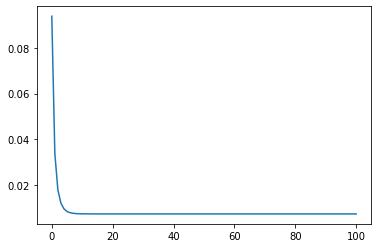

In [30]:
plt.plot(coste)